In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


In [13]:
import csv
import os

def add_expense_details(filename):
    print("\nEnter Expense Details:")

    # Take inputs for each field
    date = input("Enter date (YYYY-MM-DD): ")
    category = input("Enter category (e.g., Food, Rent, Entertainment): ")
    amount = input("Enter amount: ")
    description = input("Enter description: ")

    # Validate numeric input for amount
    try:
        amount = float(amount)
    except ValueError:
        print("Invalid amount! Please enter a numeric value.")
        return

    # Prepare expense entry
    expense = [date, category, amount, description]

    # Write to file (append mode)
    file_exists = os.path.exists(filename)
    with open(filename, mode='a', newline='') as file:
        writer = csv.writer(file)
        if not file_exists:  # Add header if file doesn't exist
            writer.writerow(["Date", "Category", "Amount", "Description"])
        writer.writerow(expense)

    print("Expense added successfully!")

# Example usage
add_expense_details("expenses.csv")



Enter Expense Details:
Enter date (YYYY-MM-DD): 2024-12-03
Enter category (e.g., Food, Rent, Entertainment): Food
Enter amount: 500
Enter description: Dinner at street 
Expense added successfully!


In [15]:
import pandas as pd

def read_expenses(filename):
    try:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv("expenses.csv")

        # Display the data
        print("\n--- Stored Expenses ---")
        print(df)

        # Show basic information about the data (optional)
        print("\nSummary Information:")
        print(df.info())

    except FileNotFoundError:
        print(f"File '{filename}' not found. Please make sure the file exists.")
    except pd.errors.EmptyDataError:
        print("The file is empty. No data to display.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
read_expenses("expenses.csv")



--- Stored Expenses ---
         Date Category  Amount                        Description
0  2024-12-06     Food   250.0             Dinner at a restaurant
1  2024-12-05     Rent  8300.0  Monthly rent given to House owner
2  2024-12-03     Food   500.0                  Dinner at street 

Summary Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3 non-null      object 
 1   Category     3 non-null      object 
 2   Amount       3 non-null      float64
 3   Description  3 non-null      object 
dtypes: float64(1), object(3)
memory usage: 224.0+ bytes
None


In [16]:
import pandas as pd

def calculate_expenses_by_category(filename):
    try:
        # Read the CSV file into a Pandas DataFrame
        df = pd.read_csv("expenses.csv")

        # Ensure the Amount column is numeric
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

        # Group by 'Category' and calculate total expenses for each
        grouped_expenses = df.groupby('Category')['Amount'].sum()

        # Display the grouped totals
        print("\n--- Total Expenses by Category ---")
        print(grouped_expenses)

        return grouped_expenses  # Return grouped data if needed for further analysis

    except FileNotFoundError:
        print(f"File '{filename}' not found.")
    except pd.errors.EmptyDataError:
        print("The file is empty. No data to group.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Example usage
calculate_expenses_by_category("expenses.csv")



--- Total Expenses by Category ---
Category
Food     750.0
Rent    8300.0
Name: Amount, dtype: float64


,Amount
Category,
Food,750.0
Rent,8300.0


In [17]:
import pandas as pd

def analyze_expenses(filename):
    try:
        # Load the CSV file
        df = pd.read_csv("expenses.csv")

        # Convert the Date column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure numeric values for Amount

        # Drop rows with invalid or missing values
        df = df.dropna(subset=['Date', 'Amount'])

        # Extract Month-Year for grouping
        df['Month'] = df['Date'].dt.to_period('M')  # Format like "2024-01"

        # Calculate monthly total expenses
        monthly_totals = df.groupby('Month')['Amount'].sum()

        # Calculate daily average expenses
        df['Day'] = df['Date'].dt.date  # Extract the date (day)
        daily_totals = df.groupby('Day')['Amount'].sum()
        average_daily_expense = daily_totals.mean()

        # Print results
        print("Monthly Total Expenses:")
        print(monthly_totals)

        print(f"\nAverage Daily Expense: ${average_daily_expense:.2f}")

    except Exception as e:
        print(f"Error: {e}")

# Example usage
analyze_expenses("expenses.csv")


Monthly Total Expenses:
Month
2024-12    9050.0
Freq: M, Name: Amount, dtype: float64

Average Daily Expense: $3016.67


In [19]:
def show_expense_pie_chart(filename):
    # Load the CSV file
    df = pd.read_csv("expenses.csv")

    # Group by category and calculate the total for each
    category_totals = df.groupby('Category')['Amount'].sum()

    # Plot the pie chart
    category_totals.plot.pie(
        autopct='%1.1f%%',  # Show percentages
        startangle=90,      # Rotate chart for better display
        figsize=(6, 6),     # Set chart size
    )

    # Add title and display the chart
    plt.title("Expenses by Category")
    plt.ylabel("")  # Hide y-axis label for cleaner look
    plt.show()
    show_expense_pie_chart("expenses.csv")

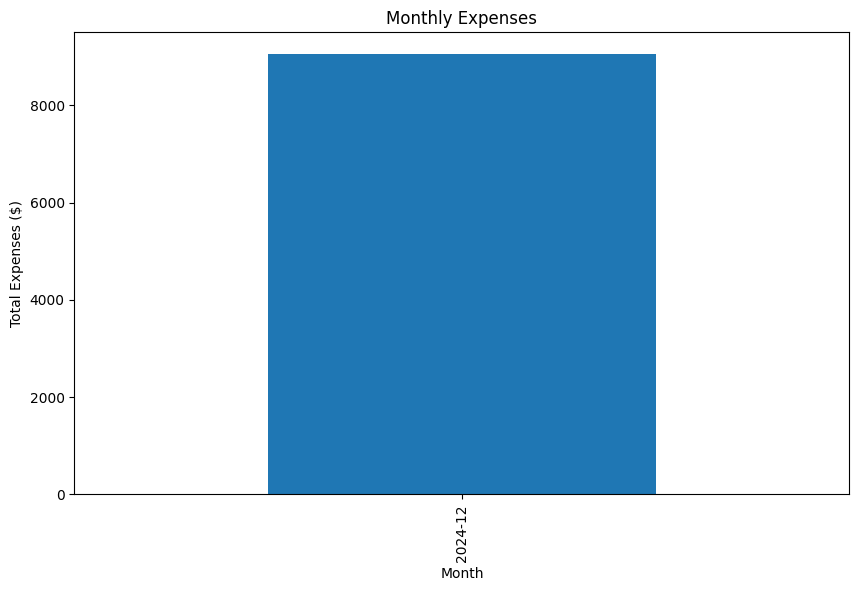

In [20]:


def show_monthly_expenses_bar_chart(filename):
    # Load the CSV file
    df = pd.read_csv("expenses.csv")

    # Convert 'Date' column to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure Amount is numeric

    # Drop rows with missing values in 'Amount' or 'Date'
    df = df.dropna(subset=['Date', 'Amount'])

    # Extract Month-Year for grouping
    df['Month'] = df['Date'].dt.to_period('M')

    # Group by Month and sum the expenses
    monthly_totals = df.groupby('Month')['Amount'].sum()

    # Plot the bar chart
    monthly_totals.plot(kind='bar', figsize=(10, 6))

    # Add title and labels
    plt.title('Monthly Expenses')
    plt.xlabel('Month')
    plt.ylabel('Total Expenses ($)')

    # Display the chart
    plt.show()

# Example usage
show_monthly_expenses_bar_chart("expenses.csv")


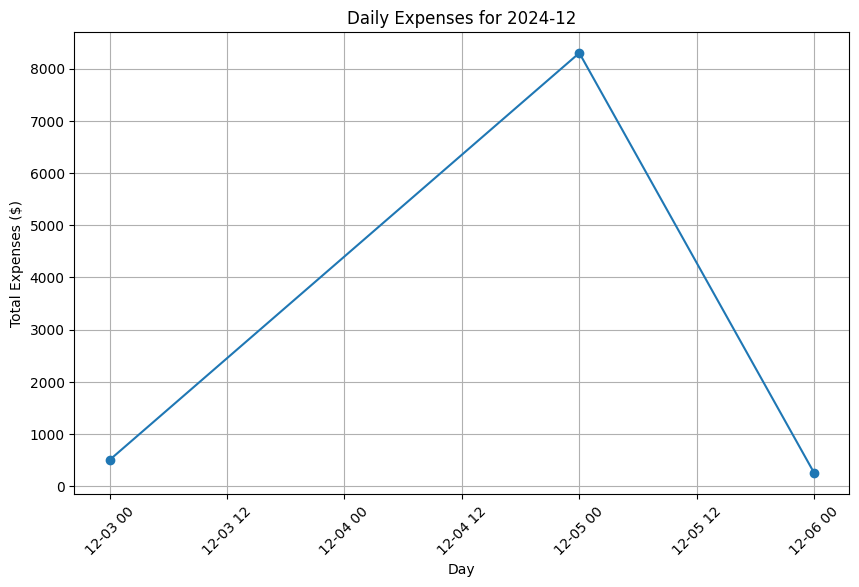

In [21]:


def show_daily_expenses_line_graph(filename, selected_month):
    # Load the CSV file
    df = pd.read_csv("expenses.csv")

    # Convert 'Date' to datetime format
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')  # Ensure Amount is numeric

    # Drop rows with invalid data
    df = df.dropna(subset=['Date', 'Amount'])

    # Filter data for the selected month
    df['Month'] = df['Date'].dt.to_period('M')
    df['Day'] = df['Date'].dt.date  # Extract only the day part

    # Select data for the specified month
    selected_data = df[df['Month'] == selected_month]

    # Group by Day and sum the expenses
    daily_totals = selected_data.groupby('Day')['Amount'].sum()

    # Plot the line graph
    daily_totals.plot(kind='line', marker='o', figsize=(10, 6))

    # Add title and labels
    plt.title(f"Daily Expenses for {selected_month}")
    plt.xlabel('Day')
    plt.ylabel('Total Expenses ($)')

    # Display the graph
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()

# Example usage: Plot daily expenses for "2024-01"
show_daily_expenses_line_graph("expenses.csv", "2024-12")


In [25]:
import pandas as pd

def add_new_expense(filename):
    # Get user input for the new expense
    date = input("Enter the date (YYYY-MM-DD): ")
    category = input("Enter the category (e.g., Food, Rent, etc.): ")
    amount = float(input("Enter the amount: "))
    description = input("Enter the description (optional): ")

    # Create a new DataFrame with the new expense data
    new_expense = pd.DataFrame({
        'Date': [date],
        'Category': [category],
        'Amount': [amount],
        'Description': [description]
    })

    # Read the existing CSV file
    try:
        df = pd.read_csv("expenses.csv")
    except FileNotFoundError:
        # If file doesn't exist, create a new DataFrame
        df = pd.DataFrame(columns=['Date', 'Category', 'Amount', 'Description'])


    # Save the updated data back to the CSV file
    df.to_csv("expenses.csv", index=False)

    print("New expense entry added successfully!")

# Example usage
add_new_expense("expenses.csv")


Enter the date (YYYY-MM-DD): 2024-11-07
Enter the category (e.g., Food, Rent, etc.): Rent
Enter the amount: 8000
Enter the description (optional): Monthly rent for huse owner
New expense entry added successfully!


In [26]:


def delete_expense(filename):
    # Load the CSV file into a DataFrame
    df = pd.read_csv("expenses.csv")

    # Ask the user if they want to delete by entry ID or description
    choice = input("Do you want to delete by entry ID (i) or description (d)? ").strip().lower()

    if choice == 'i':
        # Delete by entry ID (index)
        entry_id = int(input("Enter the entry ID (index number) to delete: "))
        if entry_id in df.index:
            df = df.drop(entry_id)
            print(f"Entry with ID {entry_id} deleted successfully!")
        else:
            print("Invalid entry ID!")
    elif choice == 'd':
        # Delete by description
        description = input("Enter the description of the expense to delete: ").strip()
        matching_rows = df[df['Description'].str.contains(description, case=False, na=False)]

        if not matching_rows.empty:
            print("Matching entries found:")
            print(matching_rows)
            confirm = input("Do you want to delete these entries? (y/n): ").strip().lower()
            if confirm == 'y':
                df = df[~df['Description'].str.contains(description, case=False, na=False)]
                print("Expenses deleted successfully!")
        else:
            print("No matching entries found!")

    else:
        print("Invalid option!")

    # Save the updated data back to the CSV file
    df.to_csv(filename, index=False)

# Example usage
delete_expense("expenses.csv")


Do you want to delete by entry ID (i) or description (d)? d
Enter the description of the expense to delete: Monthly rent for huse owner
No matching entries found!


In [27]:
import pandas as pd

def generate_expense_report(filename):
    # Read the CSV file into a DataFrame
    df = pd.read_csv("expenses.csv")

    # Ensure 'Amount' is numeric and 'Date' is in datetime format
    df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

    # Remove rows with invalid data
    df = df.dropna(subset=['Amount', 'Date'])

    # Calculate total expenses
    total_expenses = df['Amount'].sum()

    # Calculate category-wise expenses
    category_expenses = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

    # Display the results
    print("Total Expenses: $", total_expenses)
    print("\nCategory-wise Expenses:")
    print(category_expenses)

    # Save the report to a text file
    with open("expense_report.txt", "w") as file:
        file.write(f"Total Expenses: ${total_expenses}\n\n")
        file.write("Category-wise Expenses:\n")
        file.write(category_expenses.to_string())

# Example usage
generate_expense_report("expenses.csv")


Total Expenses: $ 9050.0

Category-wise Expenses:
Category
Rent    8300.0
Food     750.0
Name: Amount, dtype: float64
